<a href="https://colab.research.google.com/github/junieberry/NLP-withPyTorch/blob/main/01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 지도 학습

- 샘플 (intput)
- 타깃 (label)
- 모델 (model)
- 파라미터 (weight)
- 예측 (prediction)
- 손실 함수 (loss)

지도 학습은 샘플 n개 전체의 누적 손실을 최소화하는 최적의 파라미터 혹은 가중치 w를 찾는 과정이다.




## 1.2 샘플과 타깃의 인코딩



### 1.2.1 원-핫 표현 (one-hot representation)

- 카운트 기반의 표현
- 0 벡터에서 시작해 단어에 상응하는 원소를 1로 설정



### 1.2.2 TF 표현 (Term-Frequency)

- 소속 단어의 원-핫 표현을 합해서 만든다.
- Bag of Words (BoW)

one_hot [[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]
vacab ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


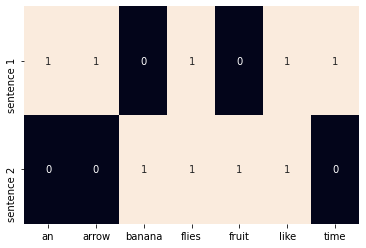

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time Flies like an arrow.', 'Fruit flies like a banana']

## 기본값은 binary=Flase로 단어 등장 횟수를 기록한 표현을 만든다.
one_hot_vectorizer = CountVectorizer(binary=True)
## CountVectorizer는 희소 행렬을 반환하므로 toarray()로 밀집 행렬로 변환
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
print('one_hot',one_hot)

vocab  = one_hot_vectorizer.get_feature_names()
print('vacab', vocab)
sns.heatmap(one_hot, annot = True, cbar = False, xticklabels=vocab, yticklabels=['sentence 1','sentence 2'])

### 1.2.3 TF-IDF 표현 (Term-Frequency-Inverse-Document-Frequency)
때로는 흔한 단어에 중요한 정보가 담기지 않고, 희귀한 단어에 중요한 정보가 담길 때가 있다.
IDF는 벡터 표현에서 흔한 토큰의 점수를 낮추고 드문 토큰의 점수를 높인다.

`IDF(w) = log(N/n)`

- w = 단어
- N = 전체 문서의 수
- n = w가 등장하는 문서의 수

TF-IDF 점수는 TF와 IDF를 곱해서 나온다.

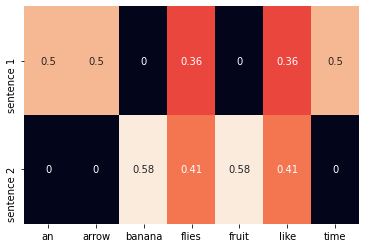

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['sentence 1','sentence 2'])

## TfidVectorizer은 IDF(w)=log(N+1/n+1)처럼 분모 분자에 1을 더해 분모가 0이 되는 상황을 방지한다.
## 이렇게 계산한 값을 L2노름으로 정규화한다.

## 1.4 파이토치 기초

In [3]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [4]:
import torch

### 1.4.2 텐서 만들기

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

In [5]:
def describe(x):
  print('''
  타입 : {0}
  크기: {1}
  값:\n{2}
  '''.format(x.type(), x.shape,x))

In [6]:
## 차원을 지정해서 [0,1) 범위의 균등 분포에서 랜덤하게 샘플링
describe(torch.Tensor(2,3))

## 균등 분포
describe(torch.rand(2,3))
## 표준 정규 분포
describe(torch.randn(2,3))


## 동일 스칼라값으로 채운 텐서
describe(torch.zeros(2,3))
describe(torch.ones(2,3))

## fill_()로 특정 값으로 채우기
x = torch.ones(2,3)
x.fill_(5)
describe(x)


  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1.0642e-28, 3.0907e-41, 3.7835e-44],
        [0.0000e+00,        nan, 3.0907e-41]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0.2836, 0.3053, 0.5337],
        [0.2268, 0.4685, 0.6609]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[ 0.8793, -0.1563, -0.3929],
        [-0.5178, -1.2870, -0.5046]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[5., 5., 5.],
        [5., 5., 5.]])
  


### 1.4.3 텐서 타입과 크기

torch.Tensor의 기본 타입은 torch.FloatTensor이다.

텐서 초기화 방법
1. FloatTensor이나 LongTensor과 같은 특정 텐서 타입 생성자 직접 호출
2. torch.tensor()와 dtype 매개변수 활용

In [7]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int64)
describe(x)

x=x.float()
describe(x)


  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1, 2, 3],
        [4, 5, 6]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1, 2, 3],
        [4, 5, 6]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
  


### 1.4.4 텐서 연산

In [8]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])

describe(torch.add(x,x))
describe(x+x)


  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
  


In [9]:
x = torch.arange(6)
describe(x)


## view()는 같은 데이터를 공유하는 새로운 텐서 생성
x = x.view(2,3)
describe(x)

describe(torch.sum(x, dim=0))
describe(torch.sum(x, dim=1))
## 두번째, 세번째 매개변수 차원을 전치
describe(torch.transpose(x,0,1))



  타입 : torch.LongTensor
  크기: torch.Size([6])
  값:
tensor([0, 1, 2, 3, 4, 5])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0, 1, 2],
        [3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([3])
  값:
tensor([3, 5, 7])
  

  타입 : torch.LongTensor
  크기: torch.Size([2])
  값:
tensor([ 3, 12])
  

  타입 : torch.LongTensor
  크기: torch.Size([3, 2])
  값:
tensor([[0, 3],
        [1, 4],
        [2, 5]])
  


### 1.4.5 인덱싱, 슬라이싱, 연결

텐서 슬라이싱과 인덱싱

In [10]:
x = torch.arange(6).view(2,3)

describe(x)
describe(x[:1,:2])
describe(x[0,1])


  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0, 1, 2],
        [3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([1, 2])
  값:
tensor([[0, 1]])
  

  타입 : torch.LongTensor
  크기: torch.Size([])
  값:
1
  


복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기 ☹

In [11]:
## index_select()가 반환하는 텐서는 dim 매개변수에 지정한 차원의 크기가 index 매개변수에 지정한 텐서의 길이와 같다.
## 나머지 차원은 원본 텐서와 크기가 같다.
describe(x)

indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices))

indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim=0, index=indices))




  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0, 1, 2],
        [3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 2])
  값:
tensor([[0, 2],
        [3, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0, 1, 2],
        [0, 1, 2]])
  


텐서 연결

In [12]:
describe(x)

describe(torch.cat([x,x], dim=0))
describe(torch.cat([x,x], dim=1))
describe(torch.stack([x,x]))


  타입 : torch.LongTensor
  크기: torch.Size([2, 3])
  값:
tensor([[0, 1, 2],
        [3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([4, 3])
  값:
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 6])
  값:
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
  

  타입 : torch.LongTensor
  크기: torch.Size([2, 2, 3])
  값:
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])
  


선형 대수 계산

In [13]:
x1 = torch.arange(6).view(2,3).long()
x2 = torch.ones(3,2).long()
x2[:,1] += 1

describe(torch.mm(x1, x2))


  타입 : torch.LongTensor
  크기: torch.Size([2, 2])
  값:
tensor([[ 3,  6],
        [12, 24]])
  


### 1.4.6 텐서와 계산 그래프


gradient 연산을 할 수 있는 텐서 만들기


In [14]:
## requires_grad=True로 텐서를 만들면 파이토치는 gradient 계산에 사용되는 부가 정보를 관리한다.
## forward 계산을 기록한 후 계산이 끝나면 backward 계산을 수행한다.
x = torch.ones(2,2, requires_grad=True)

y = (x + 2) * (x + 5) + 3
z = y.mean()
z.backward()

print(x.grad)

tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


### 1.4.7 CUDA 텐서
CUDA API는 NVIDIA에서 만들어져 NVIDIA GPU에서만 사용 가능하다.
CPU나 GPU와 같은 장치에 상관없이 동작하는 코드가 바람직하다.
CUDA 텐서와 CPU 텐서를 같이 연산하려고 하면 오류가 발생한다.

In [15]:
torch.cuda.is_available()

True

In [16]:
## 장치에 무관한 텐서 초기화
device = torch.device("cuda" if torch.cuda.is_available else "CPU")
print(device)

cuda


In [17]:
x = torch.rand(3,3).to(device)
describe(x)


  타입 : torch.cuda.FloatTensor
  크기: torch.Size([3, 3])
  값:
tensor([[0.1793, 0.0168, 0.4329],
        [0.0443, 0.9500, 0.8933],
        [0.6130, 0.4550, 0.0725]], device='cuda:0')
  


## 연습문제

1. 2D 텐서 만들고 차원 0 위치에 크기가 1인 차원 추가
2. 이전 텐서에서 추가한 차원 삭제
3. 범위가 [3,7)이고 크기가 5x3인 랜덤한 텐서
4. 정규 분표를 사용해 텐서
5. torch.Tensor([1,1,1,0,1])에서 0이 아닌 원소의 인덱스 추출
6. 크기가 (3,1)인 텐덤한 텐서 만들고 네 벌 복사
7. torch.rand(3,4,5)와 torch.rand(3,5,4)의 배치 행렬 곱셈
8. torch.rand(3,4,5)와 torch.rand(5,4)의 배치 행렬 곱셈

In [22]:
## 1 2D 텐서 만들고 차원 0 위치에 크기가 1인 차원 추가
x = torch.Tensor(2,3)
x.unsqueeze(0)

describe(x)
describe(x.unsqueeze(0))


  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1.0050e+17, 3.0907e-41, 1.6395e-43],
        [1.5414e-43, 1.6115e-43, 1.5835e-43]])
  

  타입 : torch.FloatTensor
  크기: torch.Size([1, 2, 3])
  값:
tensor([[[1.0050e+17, 3.0907e-41, 1.6395e-43],
         [1.5414e-43, 1.6115e-43, 1.5835e-43]]])
  


In [24]:
## 2 이전 텐서에서 추가한 차원 삭제
x.squeeze(0)
describe(x.squeeze(0))


  타입 : torch.FloatTensor
  크기: torch.Size([2, 3])
  값:
tensor([[1.0050e+17, 3.0907e-41, 1.6395e-43],
        [1.5414e-43, 1.6115e-43, 1.5835e-43]])
  


In [26]:
## 3 범위가 [3,7)이고 크기가 5x3인 랜덤한 텐서
x = torch.rand(5,3) * 4 + 3
describe(x)


  타입 : torch.FloatTensor
  크기: torch.Size([5, 3])
  값:
tensor([[3.4603, 3.4521, 4.8941],
        [5.3457, 5.9331, 5.0711],
        [4.4928, 4.2478, 4.8555],
        [5.9414, 3.6699, 4.5867],
        [3.7795, 5.3265, 5.5063]])
  


In [27]:
## 4 정규 분표를 사용해 텐서
x = torch.randn(3,3)
describe(x)


  타입 : torch.FloatTensor
  크기: torch.Size([3, 3])
  값:
tensor([[ 1.0570,  0.4244,  0.5439],
        [-0.1504, -0.7109, -0.1781],
        [ 1.2347, -2.7667, -0.9831]])
  


In [29]:
## 5 torch.Tensor([1,1,1,0,1])에서 0이 아닌 원소의 인덱스 추출
x = torch.Tensor([1,1,1,0,1])
torch.nonzero(x)

tensor([[0],
        [1],
        [2],
        [4]])

In [35]:
## 6 크기가 (3,1)인 텐덤한 텐서 만들고 네 벌 복사
x = torch.rand(3,1)
x = torch.cat([x,x,x,x],dim=0)
describe(x)


  타입 : torch.FloatTensor
  크기: torch.Size([12, 1])
  값:
tensor([[0.5495],
        [0.2648],
        [0.7196],
        [0.5495],
        [0.2648],
        [0.7196],
        [0.5495],
        [0.2648],
        [0.7196],
        [0.5495],
        [0.2648],
        [0.7196]])
  


In [36]:
## 7 torch.rand(3,4,5)와 torch.rand(3,5,4)의 배치 행렬 곱셈
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
describe(torch.bmm(a,b))


  타입 : torch.FloatTensor
  크기: torch.Size([3, 4, 4])
  값:
tensor([[[1.6907, 0.8614, 1.3010, 1.3053],
         [2.3719, 1.5668, 1.8407, 1.5305],
         [1.7888, 0.9618, 1.1664, 0.8405],
         [2.0621, 1.3095, 1.6687, 1.7336]],

        [[0.3285, 0.6800, 0.7933, 0.3404],
         [1.1972, 1.4047, 1.7739, 0.9832],
         [0.6513, 0.8225, 1.1551, 0.5281],
         [2.3002, 1.7028, 2.2996, 1.7471]],

        [[1.4963, 0.6565, 0.8432, 1.0468],
         [1.6434, 0.7311, 1.0708, 1.6783],
         [1.5797, 0.8168, 1.1891, 1.5548],
         [1.3183, 0.7111, 0.6745, 1.4058]]])
  


In [37]:
## 8 torch.rand(3,4,5)와 torch.rand(5,4)의 배치 행렬 곱셈
a = torch.rand(3,4,5)
b = torch.rand(5,4)
describe(torch.matmul(a,b))


  타입 : torch.FloatTensor
  크기: torch.Size([3, 4, 4])
  값:
tensor([[[1.1190, 1.3416, 1.5929, 1.9103],
         [1.0425, 0.9865, 1.2707, 1.4816],
         [1.3091, 1.4546, 1.8106, 2.2325],
         [0.6997, 0.5325, 0.9514, 0.8022]],

        [[1.1056, 1.3991, 1.4238, 1.9423],
         [1.1010, 1.0553, 1.4147, 1.5208],
         [0.5224, 0.6108, 0.8469, 1.0616],
         [1.3752, 1.4372, 1.4339, 1.7704]],

        [[1.6468, 1.7940, 1.8865, 2.3548],
         [1.2265, 1.6169, 1.3346, 2.0842],
         [0.7076, 1.0053, 0.5585, 0.9898],
         [1.0967, 1.3822, 1.6138, 2.0482]]])
  
